In [1]:
%%HTML
<style>
div.prompt {display:none}
</style>
// hide input prompt
$(document).ready(function() {
    $('div.prompt').css('display', 'none');
});

평균: 0.0
표준편차: 1.0
표준정규분포에서 x가 1일때 확률: 0.24197072451914337


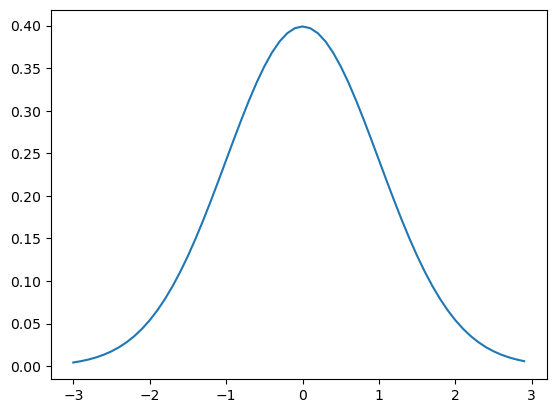

In [2]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 평균이 0, 표준편차가 1인 정규분포
sn = stats.norm(loc=0, scale=1)
print('평균:',sn.mean())
print('표준편차:',sn.std())
print('표준정규분포에서 x가 1일때 확률:',sn.pdf(x=1))

x_plot = np.arange(-3.0, 3.0, 0.1)
plt.plot(x_plot, stats.norm.pdf(loc=0, scale=1, x=x_plot))
plt.show()

<Axes: ylabel='Density'>

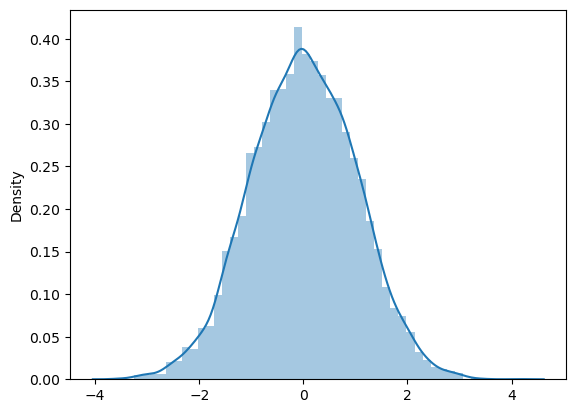

In [3]:
#평균 0. 표준편차 1 인 정규분포에서 10,000개의 랜덤 표본을 생성

from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sn= stats.norm.rvs(loc=0, scale=1, size=10000)
sn.mean()
sn.std()
sns.distplot(sn)

<Axes: ylabel='Density'>

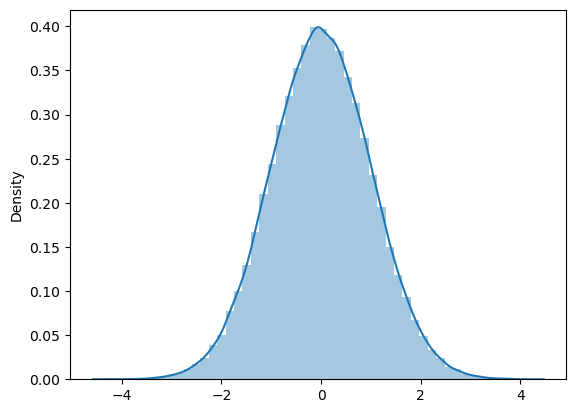

In [4]:
nr = np.random.randn(100000)
sns.distplot(nr)

<Axes: >

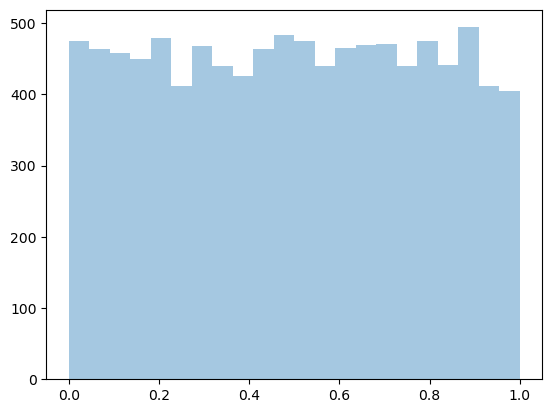

In [5]:
nr1=np.random.rand(10000)
sns.distplot(nr1,kde=False)

기계 학습 알고리즘은 종종 입력 데이터를 2차원 배열 형태로 받습니다. 일반적으로 각 행(row)은 개별 샘플(sample)을 나타내고, 각 열(column)은 특성(feature)을 나타냅니다.

이 경우 X는 100x1의 2차원 배열입니다. 100은 데이터의 샘플 개수를 나타내고, 1은 특성의 개수를 나타냅니다. 즉, 이 데이터 세트에는 100개의 샘플과 1개의 특성이 있습니다.

만약 X를 1차원 배열로 만든다면, 그것은 100개의 원소를 가진 배열이 될 것입니다. 이것은 여전히 100개의 샘플을 나타냅니다만, 이는 대부분의 기계 학습 알고리즘에 직접적으로 입력으로 사용될 수 없습니다. 

그 이유는 대부분의 알고리즘이 예상하고 있는 데이터의 형태가 각 샘플의 특성들을 포함하는 2차원 배열이기 때문입니다.

따라서 X를 2차원 배열로 만드는 이유는 이러한 기계 학습 알고리즘과의 호환성을 유지하기 위한 것입니다.

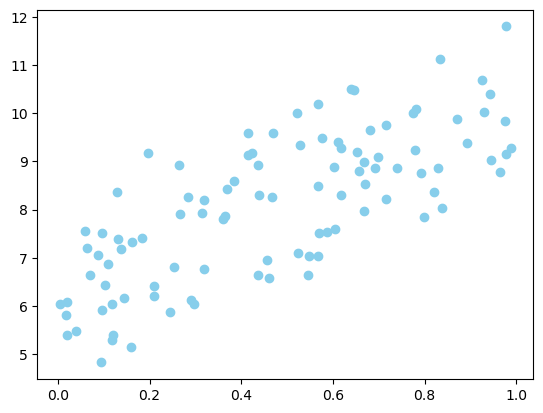

In [6]:
import pandas as pd

np.random.seed(0)
X = np.random.rand(100,1) # 0과 1 사이의 균일분포(uniform distribution)에서 무작위 실수를 생성
y= 6+4*X+np.random.randn(100,1)
# y= 6+4*X
plt.scatter(X,y,c='skyblue')

[비용 최소화]  

- 비용함수 R(w)는 변수가 w 파라미터로 이뤄진 함수이며 R(w)를 최소화하는 w0와 w1의 값은 R(w)를 w0, w1으로 순차적으로 편미분해 얻을 수 있다.  
 w1 편미분값 : $-2/N*sigmax*diff$, w0 편미분값 : $-2/N*sigma*diff$
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결과값을 마이너스 하면서 적용한다. 
- 편미분값이 너무 클 수 있기 때문에 보정 계수를 곱하는데 이를 학습률이라고 한다.

In [7]:
# w1과 x0를 업데이트 할 w1_update, w0_update를 반환
# 선형회귀 모델에서 가중치 업데이트를 수행하는 함수 get_weight_update를 정의

def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N=len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred =np.dot(X,w1.T)+w0 #전치해서 곲해준다
    diff = y-y_pred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update, w0_update

w1: 기존의 가중치 벡터 w1 (형태는 (1, m) 또는 (m, )입니다. 여기서 m은 특성(feature)의 개수를 의미합니다.)
w0: 기존의 절편(intercept) w0 (스칼라 값)
X: 입력 특성 데이터 (형태는 (n, m)입니다. 여기서 n은 샘플의 개수, m은 특성의 개수입니다.)
y: 실제 타겟 변수값 (형태는 (n, )입니다. 각 샘플에 대한 타겟 변수값을 포함하는 벡터입니다.)
learning_rate: 학습률(learning rate) 값 (기본값은 0.01)
함수 내부에서 수행되는 작업은 다음과 같습니다:

N=len(y): 입력된 타겟 변수 y의 길이를 통해 샘플의 개수 N을 구합니다.

w1_update와 w0_update를 0으로 초기화합니다. 이 변수들은 가중치 업데이트 값을 저장하기 위한 변수입니다.

y_pred = np.dot(X, w1.T) + w0: 입력 데이터 X와 현재의 가중치 w1과 절편 w0를 사용하여 예측값 y_pred를 계산합니다. 여기서 np.dot() 함수는 행렬의 곱셈을 수행합니다.

diff = y - y_pred: 실제 타겟 변수값 y와 예측값 y_pred 간의 차이를 계산합니다.

w0_factors = np.ones((N, 1)): 샘플 개수에 맞게 1로 이루어진 열 벡터를 생성합니다. 이는 절편 w0의 업데이트를 위해 사용됩니다.

w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff)): 가중치 w1의 업데이트 값을 계산합니다. X.T는 특성 데이터 X의 전치(transpose)를 나타내며, np.dot() 함수를 통해 행렬 곱셈을 수행합니다.

w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff)): 절편 w0의 업데이트 값을 계산합니다. w0_factors.T는 w0_factors의 전치를 나타내며, np.dot() 함수를 통해 행렬 곱셈을 수행합니다.

In [8]:
# 반복적으로 경사 하강법을 이용하여 get_weight_update()를 호출하여 w1과 w0를 
# 업데이트 하는 함수 생성
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def grandient_descent_steps(X,y, iters=10000):
    #w0와 w1을 모두 0으로 초기화 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    #인자로 주어진 iters 만큼 반벅적으로 get_weight_updates()를 호출하여 w1,w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
    return w1,w0
        

In [9]:
def get_cost (y,y_pred):
    N =len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost
w1,w0 = grandient_descent_steps(X,y, iters=1000)
print("w1:{0:.3f} w0:{0:.3f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('GD Total Cost:{0:.4f}'.format(get_cost (y,y_pred)))

w1:3.774 w0:3.774
GD Total Cost:0.9947


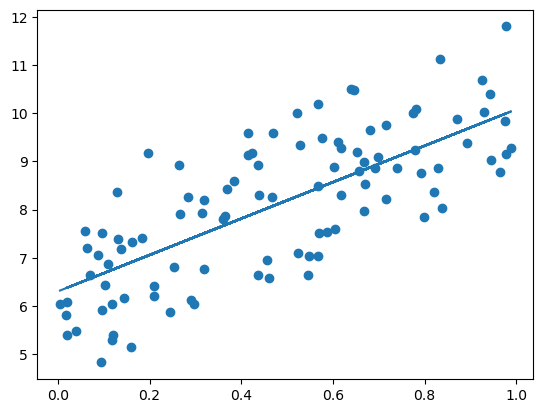

In [10]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [101]:
# # np.random.permutation()

# X = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
# print(X.shape)
# random_index = np.random.permutation(X.shape[0])
# print()

(4, 3)



In [11]:
# Q. 미니배치확률적 경사하강법으로 w0,w1 및 예측 오류비용을 계산하세요

def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X =X[stochastic_random_index[0:batch_size]]
        sample_y =y[stochastic_random_index[0:batch_size]]
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
    return w1,w0

In [12]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 3.79 w0: 6.291
Stochastic Gradient Descent Total Cost:0.9942


## 2023-05-31

In [4]:
!pip list

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-generator               1.10
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black  

In [3]:
## ! pip install scikit-learn==1.1.0 사이킷런 버젼 지정 설치

     ---------------------------------------- 7.3/7.3 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [13]:
bostonDF.B.describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

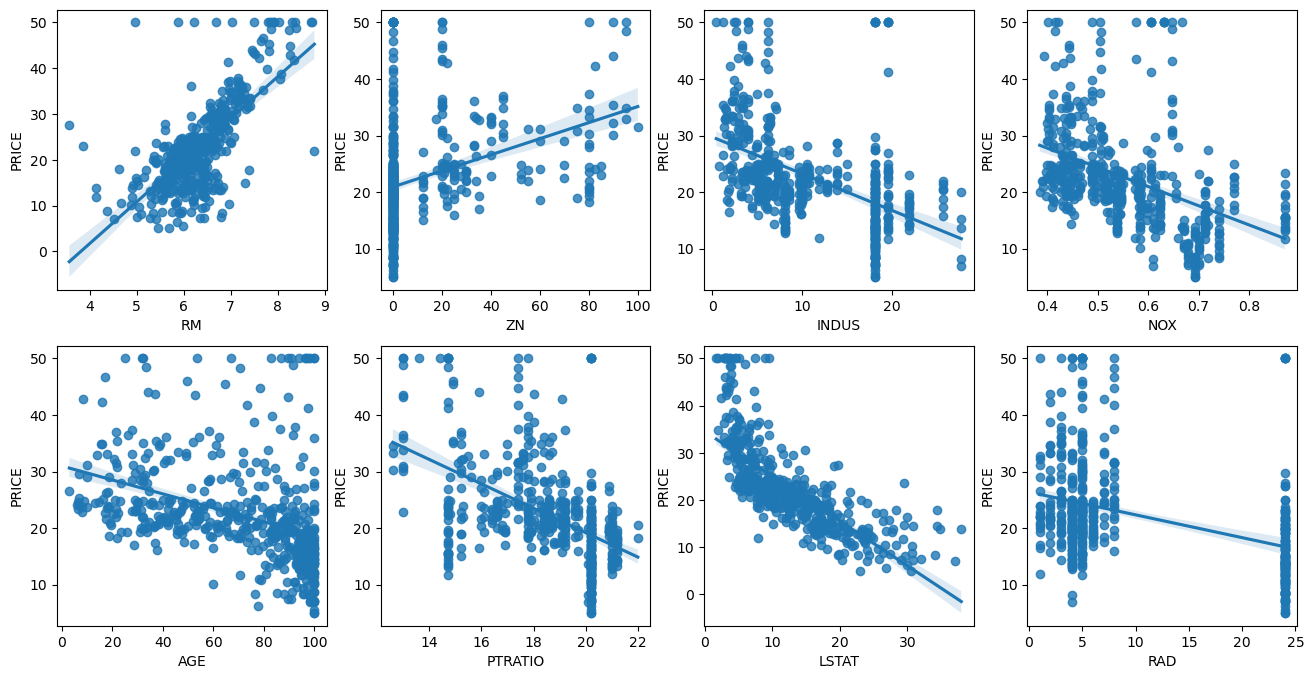

In [14]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2) #4열 2행


lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i , feature in enumerate(lm_features):
    row = int(i/4) #현재 feature의 인덱스를 4로 나눈 몫을 계산하여 행의 인덱스로 사용
    col = i%4 #현재 feature의 인덱스를 4로 나눈 나머지를 계산하여 열의 인덱스로 사용
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data, y_target,test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds= lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse= np.sqrt(mse)

print('MSE:{0:.3f}, RMS:{1:.3f}'.format(mse,rmse))
print('Variance score :{0:.3f}'.format(r2_score(y_test,y_preds)))

MSE:17.297, RMS:4.159
Variance score :0.757


In [19]:
print('절편값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편값: 40.99559517216412
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

In [23]:
#13개 중에 관련있는 것만 추려서 과대적합에 빠지는 것을 방지하면서 최적의 모델을 생성 

from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF[['LSTAT','RM']]
# X_data = bostonDF.drop(['PRICE'],axis=1, inplace=False)
lr = LinearRegression()

#cross_val_score() 로 5 Fold 셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE를 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error",cv=5)
rmse_scores= np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

#cross_val_score( scoring = "neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.79 -28.97 -47.84 -71.77 -36.61]
 5 folds 의 개별 RMSE scores :  [3.43 5.38 6.92 8.47 6.05]
 5 folds 의 평균 RMSE : 6.051 


## 2023-06-01

### Regularized Linear Model 

1. Lasso (Least Absolute Shrinkage and Selection Operator) Regression:

Lasso 회귀는 선형 회귀의 한 형태로, 특징 선택과 정규화(=규제를 가한다)를 함께 수행하여 최종 모델의 예측 성능을 향상시킵니다. Lasso는 목적 함수에 <font color=#6baed6> L1 패널티를 추가</font>하여 일부 특징의 계수를 완전히 0으로 만듭니다. 이렇게 하면 <font color=#6baed6>덜 중요한 특징이 모델에서 제외되므로 특징 선택</font>이 이루어집니다. 이 점은 고차원 데이터에서 유용합니다.

2. Ridge Regression:

Ridge 회귀도 선형 회귀의 한 형태로,<font color=#6baed6>L2 정규화를 사용</font>합니다. L2 패널티는 모든 계수의 제곱을 합한 값을 목적 함수에 더하는 것을 의미합니다. 이로 인해 <font color=#6baed6>계수가 0이 되지는 않지만, 모델의 복잡성을 줄이고 다중공선성 문제(유사한 모델이 많으면 부정적인 영향을 준다)를 완화하여 모델의 일반화 성능을 향상</font>시킵니다.

3. Elastic Net Regression:

Elastic Net 회귀는 Lasso와 Ridge 회귀의 조합입니다. L1과 L2 패널티를 모두 사용하여 <font color=#6baed6>특징 선택의 이점(불필요한 피쳐를 없앤다)과 복잡성 제어(회귀 계수를 줄여서 다중공선성 문제 해결)를 동시에 수행</font>합니다. Elastic Net은 Lasso와 Ridge의 특징을 모두 가지므로, <font color=#6baed6>적은 수의 특징이 관련성이 높을 때(Lasso)와 많은 수의 특징이 관련성이 높을 때(Ridge) 모두 좋은 성능</font>을 보입니다.

이 세 가지 회귀 방법 모두 머신러닝 모델이 훈련 데이터에 과적합되는 것을 방지하는 데 도움이 됩니다. 이는 모델이 새로운, 이전에 보지 못한 데이터에 대해 더 잘 일반화하도록 돕습니다. 이들 방법은 사이킷런의 <span style="background-color:#c6dbef">linear_model 모듈에 Lasso, Ridge, ElasticNet 클래스로 구현</span>되어 있습니다.

In [5]:
#13개 중에 관련있는 것만 추려서 과대적합에 빠지는 것을 방지하면서 최적의 모델을 생성 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 


# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# 보스톤 데이타셋의 target array는 주택가격임. 이를 price컬럼으로 DataFrame에 추가함
bostonDF['PRICE']= boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace= False)

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error",cv=5)
rmse_scores= np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [8]:
# alpha값을 변경하면서 RMSE 출력 

alphas = [0,0.1,1,10,100]

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error",cv=5)
    avg_rmse= np.mean(np.sqrt(-1*neg_mse_scores))
    print('aloha {0} 일 때 5folds의 평균 RMSE: {1:.3f}'.format(alpha,avg_rmse))

aloha 0 일 때 5folds의 평균 RMSE: 5.829
aloha 0.1 일 때 5folds의 평균 RMSE: 5.788
aloha 1 일 때 5folds의 평균 RMSE: 5.653
aloha 10 일 때 5folds의 평균 RMSE: 5.518
aloha 100 일 때 5folds의 평균 RMSE: 5.330


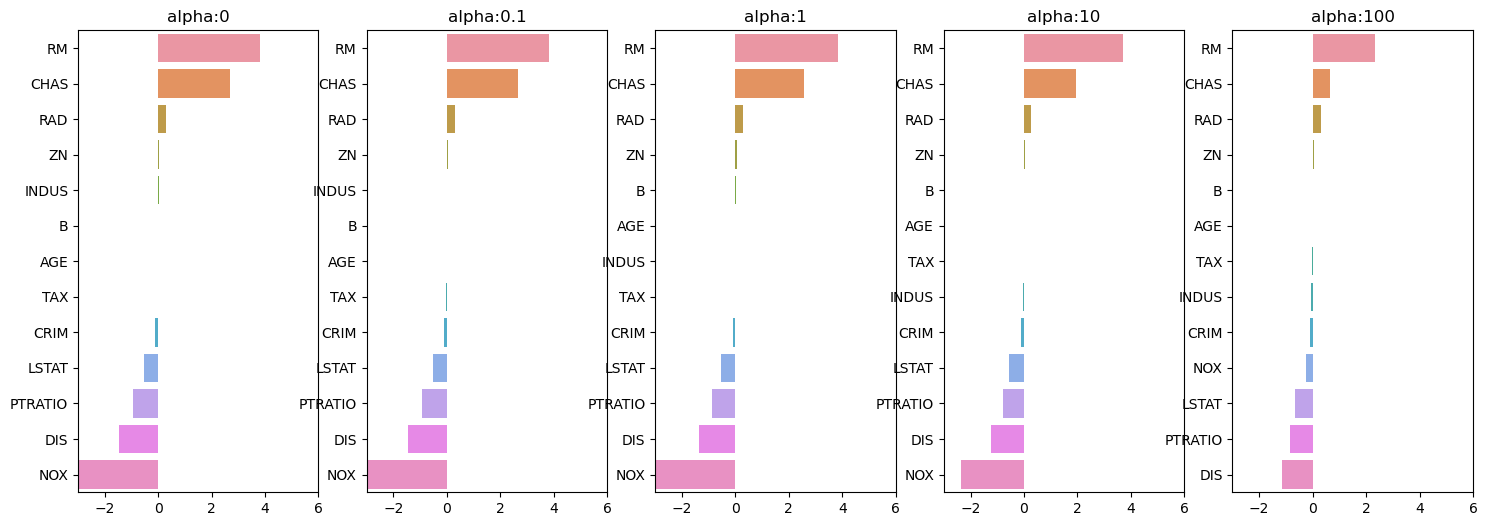

In [13]:
# 각 alpha에 따른 회귀 계수 값을 시각화 하기 위해 5개 열로 된 맷플롯립 축 생성
import matplotlib.pyplot as plt
import seaborn as sns
fig,axs = plt.subplots(figsize = (18,6),nrows=1, ncols=5)

#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

for pos,alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data = ridge.coef_, index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname]=coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [ ]:
ridge_alpha = [0,0.1,1,10.100]


## 라쏘 회귀

In [66]:
# 라쏘에 사용할 사용자 함수 만들기
from sklearn.linear_model import Lasso,ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n = None, y_target_n=None,
                       verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######', model_name, '#######')
    for param in params:
        if model_name =='Ridge': model=Ridge(alpha=param)
        elif model_name =='Lasso': model=Lasso(alpha=param)
        elif model_name =='ElasticNet': model=ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                        y_target_n, scoring="neg_mean_squared_error",cv=5)
        avg_rmse= np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha{0} 일 때 5폴드 세트의 평균 RMSE: {1:.3f}'.format(param,avg_rmse))

        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff =pd.Series(data=model.coef_,index=X_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname]=coeff

    return coeff_df
        


In [67]:
# 위에서 만든 사용자 함수의 모델을 라쏘로 설정

#라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas= [0.07, 0.1,0.5,1,3] 
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data, y_target_n=y_target)

#결과값은 위에서 만든 print내용을 따른다. 

####### Lasso #######
alpha0.07 일 때 5폴드 세트의 평균 RMSE: 5.612
alpha0.1 일 때 5폴드 세트의 평균 RMSE: 5.615
alpha0.5 일 때 5폴드 세트의 평균 RMSE: 5.669
alpha1 일 때 5폴드 세트의 평균 RMSE: 5.776
alpha3 일 때 5폴드 세트의 평균 RMSE: 6.189


In [68]:
# 알파값이 바뀜에 따라 회귀 계수들이 바뀌는것을 보여주는 내용.

sort_column = 'alpha:'+str(lasso_alphas[0]) #alpha: 0.07 기준으로 sort한것. 
                                           #[]안에 기준으로 두고자 하는 인덱스 입력
coeff_lasso_df.sort_values(by=sort_column, ascending = False)
#sort_column 기준으로 출력된다.

#coeff_lasso_df =coeff_df에 lasso를 적용했기때문에 coeff_lasso_df라고 명명


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


## 엘라스틱넷 회귀

In [69]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio = 0.7로 고정
elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params=elastic_alphas,
                                      X_data_n =X_data, y_target_n=y_target)

####### ElasticNet #######
alpha0.07 일 때 5폴드 세트의 평균 RMSE: 5.542
alpha0.1 일 때 5폴드 세트의 평균 RMSE: 5.526
alpha0.5 일 때 5폴드 세트의 평균 RMSE: 5.467
alpha1 일 때 5폴드 세트의 평균 RMSE: 5.597
alpha3 일 때 5폴드 세트의 평균 RMSE: 6.068


In [70]:
sort_column = 'alpha:'+str(elastic_alphas[0]) #alpha: 0.07 기준으로 sort한것. 
                                           #[]안에 정렬 기준으로 두고자 하는 인덱스 입력
coeff_elastic_df.sort_values(by=sort_column, ascending = False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 선형 회귀 모델을 위한 데이터 변환

In [76]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree !=None:
        scaled_data =PolynomialFeatures(degree=p_degree,
                                        include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [81]:
alphas = [0.1,1,10,100]

scale_methods=[(None,None),('Standard',None), ('Standard',2),
               ('MinMax',None),('MinMax',2),('Log',None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0],p_degree = scale_method[1],
                                   input_data = X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree: {1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n = X_data_scaled,
                       y_target_n = y_target, verbose = False, return_coeff = False)


## 변환 유형:None, Polynomial Degree: None
alpha0.1 일 때 5폴드 세트의 평균 RMSE: 5.788
alpha1 일 때 5폴드 세트의 평균 RMSE: 5.653
alpha10 일 때 5폴드 세트의 평균 RMSE: 5.518
alpha100 일 때 5폴드 세트의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree: None
alpha0.1 일 때 5폴드 세트의 평균 RMSE: 5.826
alpha1 일 때 5폴드 세트의 평균 RMSE: 5.803
alpha10 일 때 5폴드 세트의 평균 RMSE: 5.637
alpha100 일 때 5폴드 세트의 평균 RMSE: 5.421

## 변환 유형:Standard, Polynomial Degree: 2
alpha0.1 일 때 5폴드 세트의 평균 RMSE: 8.827
alpha1 일 때 5폴드 세트의 평균 RMSE: 6.871
alpha10 일 때 5폴드 세트의 평균 RMSE: 5.485
alpha100 일 때 5폴드 세트의 평균 RMSE: 4.634

## 변환 유형:MinMax, Polynomial Degree: None
alpha0.1 일 때 5폴드 세트의 평균 RMSE: 5.764
alpha1 일 때 5폴드 세트의 평균 RMSE: 5.465
alpha10 일 때 5폴드 세트의 평균 RMSE: 5.754
alpha100 일 때 5폴드 세트의 평균 RMSE: 7.635

## 변환 유형:MinMax, Polynomial Degree: 2
alpha0.1 일 때 5폴드 세트의 평균 RMSE: 5.298
alpha1 일 때 5폴드 세트의 평균 RMSE: 4.323
alpha10 일 때 5폴드 세트의 평균 RMSE: 5.185
alpha100 일 때 5폴드 세트의 평균 RMSE: 6.538

## 변환 유형:Log, Polynomial Degree: None
alpha0.1 일 때 5폴드 세트의 평균 RMSE: 4.770
alpha1 일 때 5폴드